In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy.optimize import curve_fit
%matplotlib inline

### #1

In [5]:
year_to_seconds = 365.*24*3600
t0 = 0
tf = 1*year_to_seconds
period = 1*year_to_seconds # Earth year in seconds
theta0 = 0
a = 1*1.496e13 # 1 AU in cm
e = 0 # circle
r_star = 1*6.96e10 # 1 solar radius in cm
m_star = 1*1.988e33 # 1 solar mass in grams 
r0 = a*(1-e) # periastron, aka initial/seeding distance
G = 6.674e-8 # in cgs (previously 1 in solar mass/AU/year units)

def update_theta(specific_L, r, delta_t):
    delta_theta = (specific_L/(r**2)) * delta_t
    return delta_theta

def calc_specific_L(a, e, m_star):
    return np.sqrt(G * m_star * a * (1-e**2))

def calc_r(a, e, theta):
    numerator = a*(1-e**2)
    denominator = 1 + e*np.cos(theta)
    return numerator/denominator

specific_L = calc_specific_L(a, e, m_star)
print(specific_L)

4.455198800502622e+19


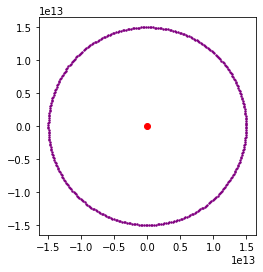

       time             r     theta
0       0.0  1.496000e+13  0.000000
1   86400.0  1.496000e+13  0.017200
2  172800.0  1.496000e+13  0.034399
3  259200.0  1.496000e+13  0.051599
4  345600.0  1.496000e+13  0.068798


In [3]:
rs = []
thetas = []
times = np.linspace(t0, tf, 366) # one iteration per day
delta_t = 1.*year_to_seconds/365
theta = theta0 # initialize theta at theta0
r = r0 # initialize r at r0
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal') # force 1 to 1 aspect ratio to confirm that it's a circle
for times_elt in times:
    rs.append(r)
    thetas.append(theta)
    delta_theta = update_theta(specific_L, r, delta_t)
    theta = theta + delta_theta
    r = calc_r(a, e, theta)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    #print(theta, x, y)
    plt.scatter(x, y, color='purple', s=2)
    
plt.scatter(0, 0, color='red')
plt.show()

df = pd.DataFrame()
df['time'] = times
df['r'] = rs
df['theta'] = thetas
print(df.head())

#### 1a)

In [ ]:
def calc_period(a, m_star):
    tf = ((4*np.pi**2*a**3)/(G*(m_star)))**0.5 # take m_p as zero, since m_p << m_star
    return tf

def vis_viva(M, r, a):
    diff = (2./r) - (1./a)
    return np.sqrt(G*M*diff)

rs = []
thetas = []
vis_vivas = []
xs = []
ys = []
a = 1.*1.496e13
e = 363./365 # from my bday
# old bday was so close to the end of the calendar that it needed a super low delta_t to make delta_thetas reasonable
# but we're not asked for this in 2d, so gonna return to e = 363/365 for the temperature part after this
e = 0.4

specific_L = calc_specific_L(a, e, m_star) # recalculate specific L using new a and e
theta = theta0 # initialize theta at theta0
r0 = a*(1-e) # recalculate new initial distance
r = r0 # and initialize r
tf = calc_period(a, m_star) # recalculate tf
times = np.linspace(t0, tf, 50000) # 10000 timesteps for 1a; 50000 timesteps for 1b
delta_t = times[1]-times[0]

#fig = plt.figure()
#ax = fig.add_subplot(111,aspect='equal') # force 1 to 1 aspect ratio to confirm that it's a circle
start = datetime.datetime.now()
for times_elt in times:
    rs.append(r)
    thetas.append(theta)
    delta_theta = update_theta(specific_L, r, delta_t)
    theta = theta + delta_theta
    r = calc_r(a, e, theta)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    xs.append(x)
    ys.append(y)
    #print(theta, x, y)
    vis_vivas.append(vis_viva(m_star, r, a))
    plt.scatter(x, y, color='purple', s=2)
end = datetime.datetime.now()
print("time elapsed: ", end-start)

plt.scatter(0, 0, color='red')

plt.show()

#df = pd.DataFrame()
#df['time'] = times
#df['r'] = rs
#df['theta'] = thetas
#print(df.head())

time elapsed:  0:00:00.608902


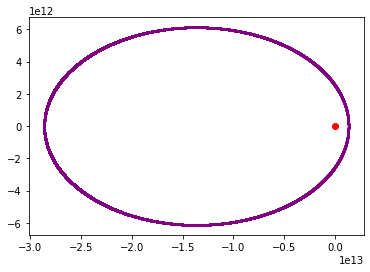

In [91]:
def calc_period(a, m_star):
    tf = ((4*np.pi**2*a**3)/(G*(m_star)))**0.5 # take m_p as zero, since m_p << m_star
    return tf

def vis_viva(M, r, a):
    diff = (2./r) - (1./a)
    return np.sqrt(G*M*diff)

a = 1.*1.496e13
e = 363./365 # from my bday
# old bday was so close to the end of the calendar that it needed a super low delta_t to make delta_thetas reasonable
# but we're not asked for this in 2d, so gonna return to e = 363/365 for the temperature part after this
e = 333./365 

specific_L = calc_specific_L(a, e, m_star) # recalculate specific L using new a and e
theta = theta0 # initialize theta at theta0
r0 = a*(1-e) # recalculate new initial distance
r = r0 # and initialize r
tf = calc_period(a, m_star) # recalculate tf
times = np.linspace(t0, tf, 50000) # 10000 timesteps for 1a; 50000 timesteps for 1b
delta_t = times[1]-times[0]

#rs = []
rs = np.zeros(len(times))
thetas = np.zeros(len(times))
xs = np.zeros(len(times))
ys = np.zeros(len(times))
vis_vivas = np.zeros(len(times))

#fig = plt.figure()
#ax = fig.add_subplot(111,aspect='equal') # force 1 to 1 aspect ratio to confirm that it's a circle
start = datetime.datetime.now()
for i, times_elt in enumerate(times):
    #rs.append(r)
    rs[i] = r
    thetas[i] = theta
    delta_theta = update_theta(specific_L, r, delta_t)
    theta = theta + delta_theta
    r = calc_r(a, e, theta)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    xs[i] = x
    ys[i] = y
    #print(theta, x, y)
    vis_vivas[i] = vis_viva(m_star, r, a)

end = datetime.datetime.now()
print("time elapsed: ", end-start)

plt.scatter(xs, ys, color='purple', s=2)
plt.scatter(0, 0, color='red')

plt.show()

#df = pd.DataFrame()
#df['time'] = times
#df['r'] = rs
#df['theta'] = thetas
#print(df.head())

In [92]:
df = pd.DataFrame({'times': times, 'thetas': thetas, 'r': rs, 'x': xs, 'y': ys, 'v': vis_vivas})
print(df.head(n=11))

          times    thetas             r             x             y  \
0      0.000000  0.000000  1.311562e+12  1.311546e+12  8.780197e+09   
1    631.269271  0.006694  1.311576e+12  1.311500e+12  1.756038e+10   
2   1262.538542  0.013389  1.311618e+12  1.311423e+12  2.634033e+10   
3   1893.807813  0.020083  1.311688e+12  1.311316e+12  3.511986e+10   
4   2525.077083  0.026776  1.311786e+12  1.311177e+12  4.389875e+10   
5   3156.346354  0.033468  1.311912e+12  1.311008e+12  5.267680e+10   
6   3787.615625  0.040159  1.312066e+12  1.310809e+12  6.145380e+10   
7   4418.884896  0.046848  1.312249e+12  1.310578e+12  7.022955e+10   
8   5050.154167  0.053535  1.312459e+12  1.310317e+12  7.900385e+10   
9   5681.423438  0.060221  1.312697e+12  1.310026e+12  8.777649e+10   
10  6312.692709  0.066904  1.312963e+12  1.309703e+12  9.654726e+10   

               v  
0   1.390868e+07  
1   1.390844e+07  
2   1.390805e+07  
3   1.390751e+07  
4   1.390681e+07  
5   1.390596e+07  
6   1.390495e+

In [93]:
s_hr_factor = 60*60

transit_duration1 = 2*r_star/df.v[0] # distance to traverse divided by velocity at theta==0
print(transit_duration1, transit_duration1/s_hr_factor)

10008.141718521136 2.780039366255871


#### 1b)

In [94]:
stop_scan = (df.y > r_star).argmax() # first index where I surpass 
print(stop_scan-1) # prove that it's at least 10 points
transit_duration2 = df.times[stop_scan-1] - min(df.times)
print(transit_duration2, transit_duration2/s_hr_factor)

6
3787.6156251046423 1.0521154514179563


I need the full star; this is just the y+ side of it

In [95]:
df_positive_x = df.loc[df.x >= 0]
df_for_1b = df_positive_x.loc[np.abs(df_positive_x.y) <= r_star]
print(len(df_for_1b))
print(df_for_1b) # this is where I noticed I need to prune the last bit of the df to cut a double-counting wraparound
df_for_1b = df_for_1b.drop(df_for_1b.tail(2).index) # drop last 2 rows

time1 = df_for_1b.loc[df_for_1b.y > 0].times.max() - df_for_1b.loc[df_for_1b.y > 0].times.min()
time2 = df_for_1b.loc[df_for_1b.y < 0].times.max() - df_for_1b.loc[df_for_1b.y < 0].times.min()
print(time1, time2)
transit_duration2 = time1 + time2
print(transit_duration2, transit_duration2/s_hr_factor)

16
              times    thetas             r             x             y  \
0      0.000000e+00  0.000000  1.311562e+12  1.311546e+12  8.780197e+09   
1      6.312693e+02  0.006694  1.311576e+12  1.311500e+12  1.756038e+10   
2      1.262539e+03  0.013389  1.311618e+12  1.311423e+12  2.634033e+10   
3      1.893808e+03  0.020083  1.311688e+12  1.311316e+12  3.511986e+10   
4      2.525077e+03  0.026776  1.311786e+12  1.311177e+12  4.389875e+10   
5      3.156346e+03  0.033468  1.311912e+12  1.311008e+12  5.267680e+10   
6      3.787616e+03  0.040159  1.312066e+12  1.310809e+12  6.145380e+10   
49991  3.155778e+07  6.229670  1.312458e+12  1.310809e+12 -6.143061e+10   
49992  3.155841e+07  6.236355  1.312248e+12  1.311009e+12 -5.265604e+10   
49993  3.155904e+07  6.243042  1.312066e+12  1.311178e+12 -4.388005e+10   
49994  3.155968e+07  6.249732  1.311912e+12  1.311316e+12 -3.510285e+10   
49995  3.156031e+07  6.256423  1.311786e+12  1.311423e+12 -2.632464e+10   
49996  3.156094e+07  6

This is a little smaller than the transit duration from 1a (around 12%).

#### 1c)

In [66]:
# calculate transit duration using Eqn 14 of Transits & Occultations
# Winn 2011 Eqn 14+16, modified from my research code
def calc_transit_duration3(P, r_star, r_planet, b, a, inc, e, omega): 
    #print(P, r_star, r_planet, b, a, inc)
    arg1 = np.sqrt((1+(r_planet/r_star))**2 - b**2) # k = r_planet/r_star
    #print("arg1: ", arg1)
    arg2 = (r_star / a) * (arg1 / np.sin(inc)) 
    #arg2 = (r_star / np.array(a)) * arg1
    #print("arg2: ", arg2)
    #print(np.sqrt(1-(333/365)**2))
    arg3 = np.sqrt(1-e**2)/(1+e*np.sin(omega)) # eccentricity factor from Eqn 16
    
    return (P / np.pi) * np.arcsin(arg2) * arg3

# housekeeping new variables
r_planet = 1*6.37e8 # Earth's radius in cm
b = 0 # assume perfect impact parameter
inc = np.pi/2
omega = np.pi/2

transit_duration3 = calc_transit_duration3(period, r_star, r_planet, b, a, inc, e=333/365, omega=omega)
print(transit_duration3, transit_duration3/s_hr_factor)

0.4094584480497403
14415.960651915699 4.004433514421027


In [83]:
r_star/a

0.006646294881588999

Compare to circular orbit

time elapsed:  0:00:05.567409


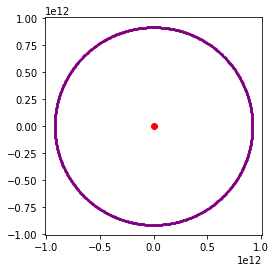

1000 50000 1000


In [52]:
rs_circular = []
thetas_circular = []
vis_vivas_circular = []
xs_circular = []
ys_circular = []
a = 0.7*1.496e13
e = 0 # circular case

specific_L = calc_specific_L(a, e, m_star) # recalculate specific L using new a and e
theta_circular = theta0 # initialize theta at theta0
r0 = a*(1-e) # recalculate new initial distance
r_circular = r0 # and initialize r
tf = calc_period(a, m_star) # recalculate tf
times = np.linspace(t0, tf, 1000) # 10000 timesteps for 1a; 50000 timesteps for 1b
delta_t = times[1]-times[0]

fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal') # force 1 to 1 aspect ratio to confirm that it's a circle
start = datetime.datetime.now()
for times_elt in times:
    rs_circular.append(r_circular)
    thetas_circular.append(theta_circular)
    delta_theta_circular = update_theta(specific_L, r_circular, delta_t)
    theta_circular = theta_circular + delta_theta_circular
    r_circular = calc_r(a, e, theta_circular)
    x_circular = r*np.cos(theta_circular)
    y_circular = r*np.sin(theta_circular)
    xs_circular.append(x_circular)
    ys_circular.append(y_circular)
    #print(theta, x, y)
    vis_vivas_circular.append(vis_viva(m_star, r, a))
    plt.scatter(x_circular, y_circular, color='purple', s=2)
end = datetime.datetime.now()
print("time elapsed: ", end-start)

plt.scatter(0, 0, color='red')

plt.show()

#df = pd.DataFrame()
#df['time'] = times
#df['r'] = rs
#df['theta'] = thetas
#print(df.head())
df_circular = pd.DataFrame({'times': times, 'thetas': thetas_circular, 'r': rs_circular, 'x': xs_circular, 
                            'y': ys_circular, 'v': vis_vivas_circular})


In [82]:
transit_duration3_circular = calc_transit_duration3(period, r_star, r_planet, b, a, inc, e=0, omega=omega)
print(transit_duration3_circular, transit_duration3_circular/s_hr_factor)

0.4094584480497403
67328.0924882196 18.702247913394334


With a highly eccentric orbit, the transit duration is nearly 3x faster.

#### 1d) 

In [ ]:
omega = np.pi


### #2

#### 2a)

In [62]:
n = 5 # pc^-3
ly_to_pc = 0.307
r = 100*ly_to_pc
au_to_pc = 4.848e-6
cross_sect_r = 10*au_to_pc
cross_sect = np.pi*cross_sect_r**2

prob_lensing = n*r*cross_sect
print(prob_lensing)

1.133400695546388e-06


In [70]:
print(cross_sect)

7.383717886295687e-09


The odds of a star associated with a globular cluster being strongly lensed by another star in the cluster is 1:1 million.

#### 2b)

In [63]:
c = 3e10 # cm/s^2
ly_to_cm = 9.461e17
rad_to_arcsec = 206265 # radians in an arcsec
D_L = 10*ly_to_cm
D_S = 100*ly_to_cm

def calc_einstein_ring_radius(M_L, D_L, D_S):
    arg1 = 4*G*M_L/(c**2)
    arg2 = (1/D_L) - (1/D_S)
    return np.sqrt(arg1 * arg2)

calc_einstein_ring_radius(m_star, D_L, D_S) * rad_to_arcsec

0.04885267023062304

In [72]:
print(D_L, D_S)

9.461e+18 9.461e+19


In [71]:
calc_einstein_ring_radius(m_star, D_L, D_S)

2.368442063880108e-07

The Einstein ring radius of the source star is 0.05".

#### 2c)

In [80]:
print("10 ly: ", 10 * ly_to_pc * calc_einstein_ring_radius(m_star, 10*ly_to_cm, D_S) * rad_to_arcsec)
print("50 ly: ", 50 * ly_to_pc * calc_einstein_ring_radius(m_star, 50*ly_to_cm, D_S) * rad_to_arcsec)

10 ly:  0.14997769760801274
50 ly:  0.2499628293466879


In [81]:
print(5/(ly_to_pc * calc_einstein_ring_radius(m_star, 50*ly_to_cm, D_S) * rad_to_arcsec))

1000.1487047230552


For a star 10 ly (3.066 pc) away, an Einstein ring radius of 0.05" corresponds to 0.15 AU. For a star 50 ly away, 0.05" corresponds to 0.25 AU. This suggests that astronomers in the middle of a globular cluster would not be able to use microlensing to find planets beyond the snow line, since the distance would have to be much larger. For 5 AU separation, we'd need a lens 1000 ly away, but the source is much closer than that (100 lyr away). 

### #3

#### 3a)

| star      | has_planet  | p(D_i \| f) |
| --------  | ----------- | ---------- |
| s1        | 1           | f          |
| s2        | 1           | f          |
| s3        | 0           | 1-f        |
| s4        | 0           | 1-f        |

#### 3b)

P({D} | f) = f^2 * (1-f)^2

#### 3c)

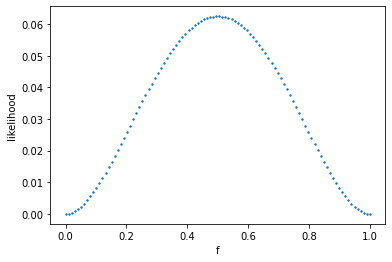

In [90]:
def calc_likelihood(f):
    likelihood = (f**2) * (1-f)**2
    return likelihood

fs = np.linspace(0, 1, 100)
likelihoods = calc_likelihood(fs)
plt.scatter(fs, likelihoods, s=2)
plt.xlabel('f')
plt.ylabel('likelihood')
plt.show()

i. The likelihood goes to 0 at f of 0 and 1.

ii. Maximum likelihood is at f = 0.5.

iii. See plot below

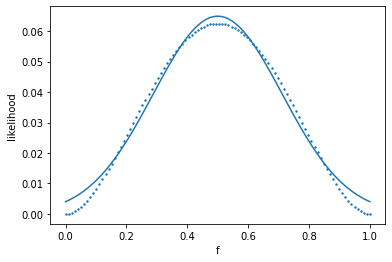

In [107]:
def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

p0 = [0.05, 0.5, 0.3]

coeff, var_matrix = curve_fit(gauss, fs, likelihoods, p0=p0)
hist_fit = gauss(fs, coeff[0], coeff[1], coeff[2])
plt.scatter(fs, likelihoods, s=2)
plt.plot(fs, hist_fit)
plt.xlabel('f')
plt.ylabel('likelihood')
plt.show()


iv. See plot below

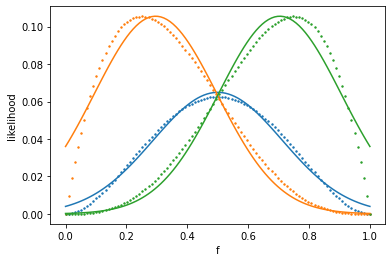

In [108]:
def calc_likelihood1(f): # one detection
    likelihood = f * (1-f)**3
    return likelihood

def calc_likelihood2(f): # three detections
    likelihood = f**3 * (1-f)
    return likelihood

likelihoods1 = calc_likelihood1(fs)
likelihoods2 = calc_likelihood2(fs)

coeff1, var_matrix1 = curve_fit(gauss, fs, likelihoods1, p0=p0)
coeff2, var_matrix2 = curve_fit(gauss, fs, likelihoods2, p0=p0)
hist_fit1 = gauss(fs, coeff1[0], coeff1[1], coeff1[2])
hist_fit2 = gauss(fs, coeff2[0], coeff2[1], coeff2[2])

plt.scatter(fs, likelihoods, s=2)
plt.scatter(fs, likelihoods1, s=2)
plt.scatter(fs, likelihoods2, s=2)
plt.plot(fs, hist_fit)
plt.plot(fs, hist_fit1)
plt.plot(fs, hist_fit2)
plt.xlabel('f')
plt.ylabel('likelihood')
plt.show()

#### 3d)